In [2]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt


df_original = pd.read_csv('events.csv', low_memory=False)

In [16]:
from sklearn.preprocessing import Normalizer

colors_and_devices = df_original.loc[df_original['event'] == 'conversion',['model', 'color']]
grouped = colors_and_devices.groupby(['model', 'color']).agg(np.size)
grouped = pd.DataFrame(grouped)
grouped = grouped.reset_index()
grouped.columns = list(['model', 'color', 'amount'])
grouped = grouped.set_index('model')
grouped = grouped.loc[grouped['amount']>20,]

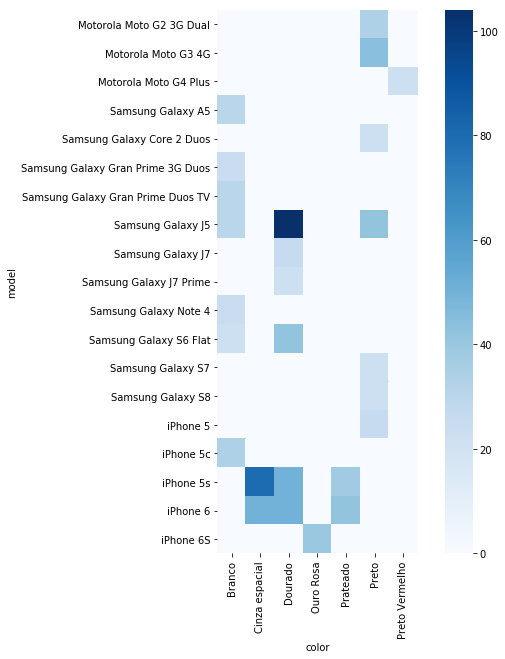

In [17]:
grouped_topn = grouped.sort_values(by='amount', ascending=False)
colors_and_devices = grouped_topn.pivot(columns='color', values='amount')
colors_and_devices = colors_and_devices.replace(np.nan, 0)
grouped_topn = colors_and_devices
#display(colors_and_devices)
plt.subplots(figsize=(10, 10))
seaborn.heatmap(grouped_topn, square=True, cmap='Blues')